In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
ZAMS_MV, ZAMS_BV = np.loadtxt('zams_02.dat.txt',unpack=True,usecols=(1,2))

Text(0, 0.5, 'mV')

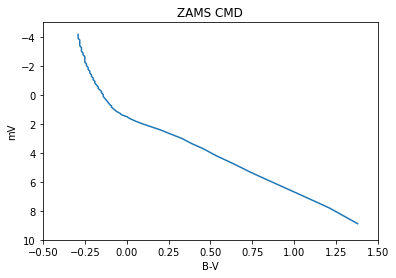

In [29]:
plt.plot(ZAMS_BV,ZAMS_MV)
plt.axis([-0.5,1.5,10,-5])
plt.title("ZAMS CMD")
plt.xlabel("B-V")
plt.ylabel("mV")

In [36]:
S_MV, S_BV = np.loadtxt('stable.dat',unpack=True,usecols=(0,1))

Text(0, 0.5, 'mV')

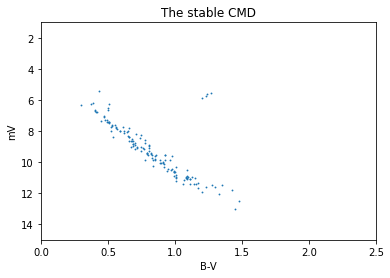

In [53]:
plt.scatter(S_BV,S_MV,s=0.7)
plt.axis([0,2.5,15,1])
plt.title("The stable CMD")
plt.xlabel("B-V")
plt.ylabel("mV")

In [55]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

In [67]:
find_nearest(S_BV,0.9)

(91, 0.9)

In [70]:
find_nearest(ZAMS_BV,0.3)

(9, 0.33)

In [62]:
S_MV[6] - ZAMS_MV[6]

2.4800000000000004

In [167]:
def distance(BV_value):
    
    i1,BV1 = find_nearest(S_BV,BV_value)
    i2,BV2 = find_nearest(ZAMS_BV,BV_value)
    mu = S_MV[i1] - ZAMS_MV[i2]
    d = np.power(10, (mu+5)/5)
    return d

In [168]:
distance(1)

58.34451042737454

In [169]:
D = []
for BVs in S_BV:
    D.append(distance(BVs))

In [170]:
dS = np.mean(D)

In [171]:
np.std(D)

15.37437107678324

(array([ 6.,  0.,  5.,  5., 20., 30., 35., 28.,  9.,  2.]),
 array([ 3.5318317 , 11.57324839, 19.61466509, 27.65608178, 35.69749848,
        43.73891517, 51.78033187, 59.82174857, 67.86316526, 75.90458196,
        83.94599865]),
 <BarContainer object of 10 artists>)

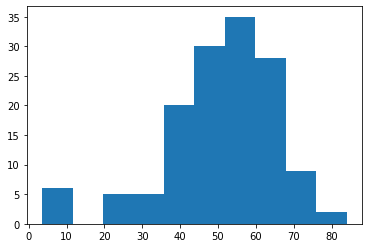

In [172]:
plt.hist(D)

In [173]:
def convert_to_m(M,d):
    m = M - 5 + 5 * np.log10(d)
    return m
    

In [180]:
ZAMS_mV=convert_to_m(ZAMS_MV,dS)

Text(0, 0.5, 'mV')

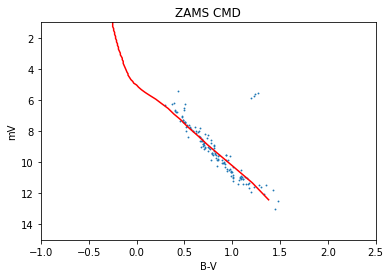

In [181]:
plt.plot(ZAMS_BV,ZAMS_mV,"r")
plt.scatter(S_BV,S_MV,s=0.7)
plt.axis([-1,2.5,15,1])
plt.title("ZAMS CMD")
plt.xlabel("B-V")
plt.ylabel("mV")